In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# set fresh env per https://mapreader.readthedocs.io/en/latest/Install.html
import os, sys
sys.path.append('../scripts/')
import mapreader
import cartopy

### Load .tif (no mask)

In [6]:
# load map tif paths
from mapreader import loader
my_files = loader("../content/tifs/*.tif")
my_files.add_geo_info() # if pre georeferenced may need to set: target_crs 
print(my_files)

  0%|          | 0/1 [00:00<?, ?it/s]

#images: 1

#parents: 1
189226695.27_clip.tif

#patches: 0



### Patchify

In [7]:
# set directory & patch size (pixels unless -- method="meters" )
my_files.patchify_all(path_save="../content/tifs/patches/", patch_size=500)

[INFO] Saving patches in directory named "../content/tifs/patches/".


  0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
parent_list = my_files.list_parents()
patch_list = my_files.list_patches()

print(parent_list)
print(patch_list[0:5])  # too many to print them all!

['189226695.27_clip.tif']
['patch-0-0-500-500-#189226695.27_clip.tif#.png', 'patch-0-500-500-1000-#189226695.27_clip.tif#.png', 'patch-0-1000-500-1500-#189226695.27_clip.tif#.png', 'patch-0-1500-500-2000-#189226695.27_clip.tif#.png', 'patch-0-2000-500-2500-#189226695.27_clip.tif#.png']


In [9]:
# save patches in memory as geotiffs 
my_files.save_patches_as_geotiffs()

  0%|          | 0/225 [00:00<?, ?it/s]

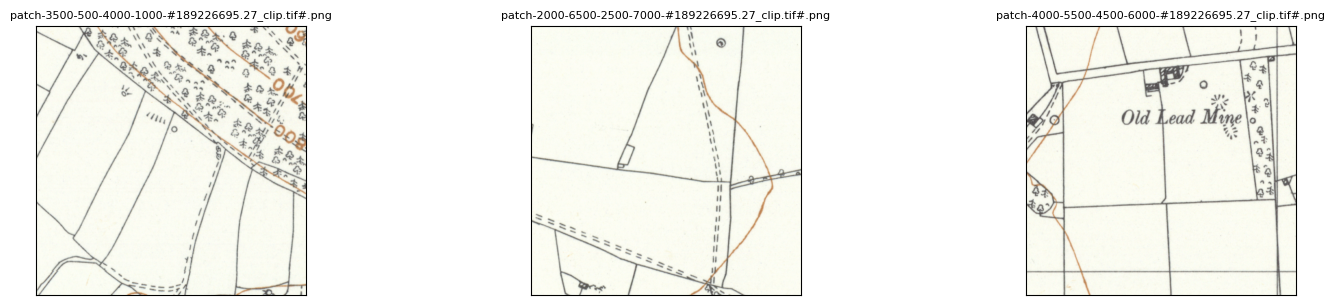

In [10]:
# take a random sample of 3 patches
my_files.show_sample(num_samples=3, tree_level="patch")

  0%|          | 0/1 [00:00<?, ?it/s]

[<Figure size 1000x1000 with 1 Axes>]

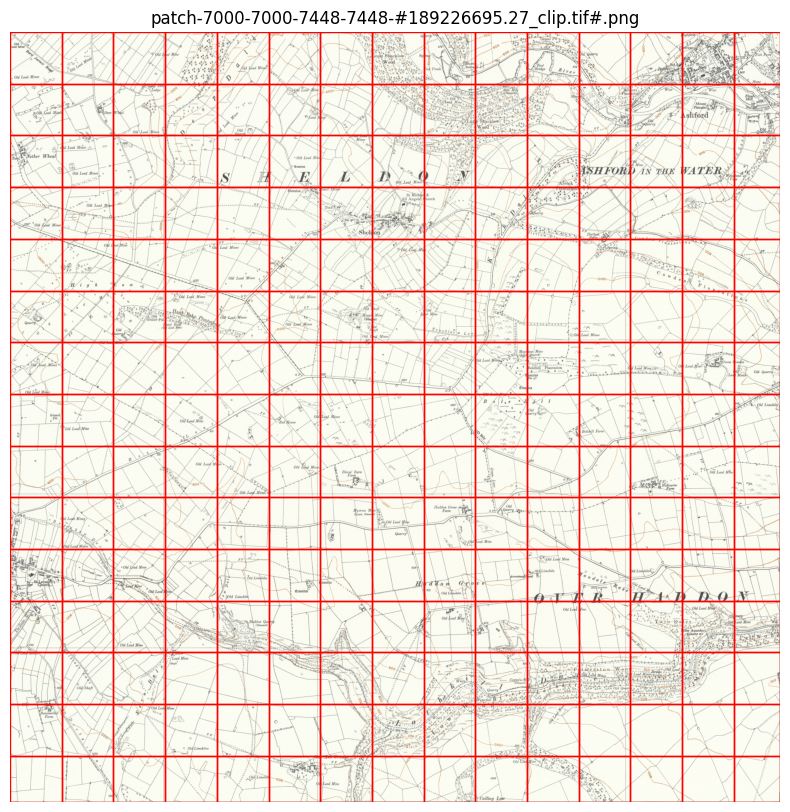

In [11]:
parent_list = my_files.list_parents()
my_files.show_parent(parent_list[0])

### Annotate

In [13]:
from mapreader.annotate.utils import prepare_annotation

annotation = prepare_annotation(
    userID="DavidA",
    annotation_tasks_file="annotation_tasks.yaml",
    task="walls",
    annotation_set="task_test_OS_maps_001",
)

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Number of images to annotate (current batch): 100


In [14]:
annotation

Annotation(canvas=OutputCanvas(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 6…

In [16]:
from mapreader.annotate.utils import save_annotation

save_annotation(
    annotation,
    userID="DavidA",
    task="walls",
    annotation_tasks_file="annotation_tasks.yaml",
    annotation_set="task_test_OS_maps_001",
)

[INFO] Save 67 new annotations to ../content/annotations_1950/walls_#DavidA#.csv
[INFO] 67 labels were not already stored
[INFO] Total number of saved annotations: 67


### Train

In [1]:
# Load and check annotations 
from mapreader import AnnotationsLoader

annotated_images = AnnotationsLoader()
annotated_images.load(annotations = "../content/annotations_1950/walls_#DavidA#.csv")

[INFO] Reading "../content/annotations_1950/walls_#DavidA#.csv"
[INFO] Number of annotations:   67

[INFO] Number of instances of each label (from column "label"):
        - 1:      54
        - 2:      13



In [2]:
# view the data
annotated_images.annotations

image_id  \
0   patch-4500-6000-5000-6500-#189226695.27_clip.t...   
1   patch-5000-6000-5500-6500-#189226695.27_clip.t...   
2   patch-3500-6500-4000-7000-#189226695.27_clip.t...   
3   patch-5000-0-5500-500-#189226695.27_clip.tif#.png   
4   patch-4000-0-4500-500-#189226695.27_clip.tif#.png   
..                                                ...   
62  patch-7000-6500-7448-7000-#189226695.27_clip.t...   
63  patch-5500-2500-6000-3000-#189226695.27_clip.t...   
64  patch-4000-4000-4500-4500-#189226695.27_clip.t...   
65  patch-6500-6500-7000-7000-#189226695.27_clip.t...   
66  patch-5500-6500-6000-7000-#189226695.27_clip.t...   

                                           image_path label  label_index  
0   c:\Users\alexad\Documents\GitHub\cnn-boundarie...     2            0  
1   c:\Users\alexad\Documents\GitHub\cnn-boundarie...     2            0  
2   c:\Users\alexad\Documents\GitHub\cnn-boundarie...     2            0  
3   c:\Users\alexad\Documents\GitHub\cnn-boundarie...     2            0  
4   c:\Users\alexad\Documents\GitHub\cnn-boundarie...     2            0  
..                                                ...   ...          ...  
62  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  
63  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  
64  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  
65  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  
66  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  

[67 rows x 4 columns]

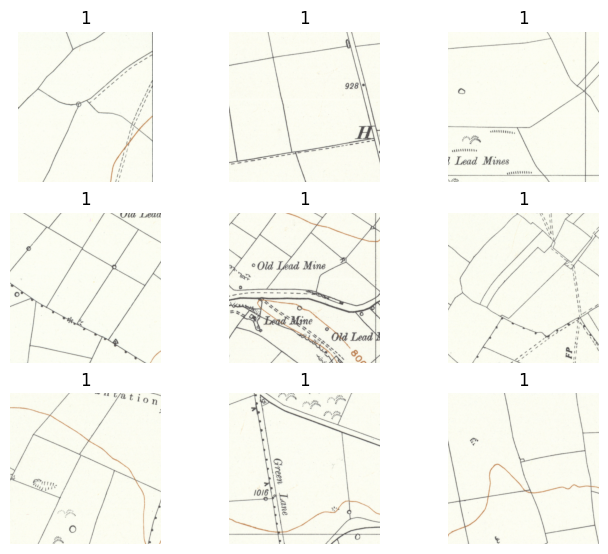

In [4]:
# look at no trees
annotated_images.show_sample(label_to_show="1")

In [4]:
# this is actually for trees not walls
annotated_images.review_labels()

[INFO] Type "exit", "end" or "stop" to exit.
[INFO] Showing 0-24 out of 67.


In [5]:
# Prepare datasets and dataloaders
annotated_images.create_datasets(frac_train=0.7, frac_val=0.2, frac_test=0.1)

[INFO] Number of annotations in each set:
        - Train:        46
        - Validate:     14
        - Test:         7


In [6]:
annotated_images.datasets["train"].patch_df.head()

image_id  \
44  patch-1500-2000-2000-2500-#189226695.27_clip.t...   
0   patch-4500-6000-5000-6500-#189226695.27_clip.t...   
23  patch-0-1500-500-2000-#189226695.27_clip.tif#.png   
60  patch-2000-6000-2500-6500-#189226695.27_clip.t...   
38  patch-500-2500-1000-3000-#189226695.27_clip.ti...   

                                           image_path label  label_index  
44  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  
0   c:\Users\alexad\Documents\GitHub\cnn-boundarie...     2            0  
23  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  
60  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1  
38  c:\Users\alexad\Documents\GitHub\cnn-boundarie...     1            1

In [7]:
annotated_images.labels_map

{0: '2', 1: '1'}

In [8]:
dataloaders = annotated_images.create_dataloaders(batch_size=8)

[INFO] Using default sampler.


### Load a pretrained PyTorch model, dataloaders and labels map

In [9]:
from mapreader import ClassifierContainer

In [11]:
my_classifier = ClassifierContainer(model ="resnet18",
                                    dataloaders=dataloaders,
                                    labels_map={0: 'no_wall', 1: 'wall'})

[INFO] Device is set to cpu
[INFO] Loaded "train" with 46 items.
[INFO] Loaded "val" with 14 items.
[INFO] Loaded "test" with 7 items.
[INFO] Initializing model.


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\alexad/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [12]:
my_classifier.labels_map

{0: 'no_wall', 1: 'wall'}

[INFO] dataset: train
        - items:        46
        - batch size:   8
        - batches:      6


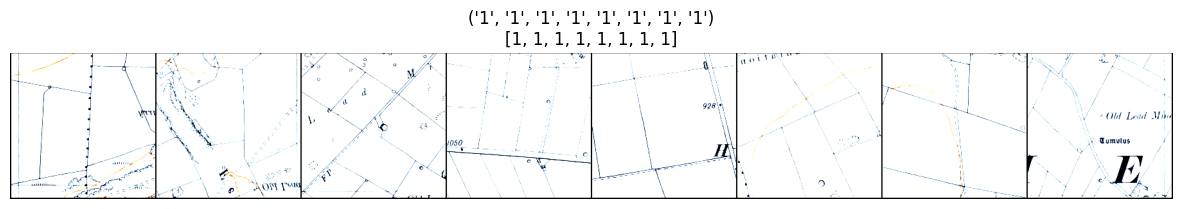

In [13]:
my_classifier.show_sample(set_name='train', batch_number=1)

In [14]:
my_classifier.model_summary()

Layer (type:depth-idx)                   Output Shape              Output Shape              Param #
ResNet                                   [8, 2]                    [8, 2]                    --
├─Conv2d: 1-1                            [8, 64, 112, 112]         [8, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [8, 64, 112, 112]         [8, 64, 112, 112]         128
├─ReLU: 1-3                              [8, 64, 112, 112]         [8, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [8, 64, 56, 56]           [8, 64, 56, 56]           --
├─Sequential: 1-5                        [8, 64, 56, 56]           [8, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [8, 64, 56, 56]           [8, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [8, 64, 56, 56]           [8, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [8, 64, 56, 56]           [8, 64, 56, 56]           128
│    │    └─ReLU: 3-3     

In [15]:
# Set up criterion, optimizer and scheduler
my_classifier.add_criterion("cross-entropy")

[INFO] Using "CrossEntropyLoss()" as criterion.


In [16]:
params_to_optimize = my_classifier.generate_layerwise_lrs(min_lr=1e-4, max_lr=1e-3, spacing='geomspace')

In [17]:
my_classifier.initialize_optimizer(params2optimize=params_to_optimize)

In [18]:
my_classifier.initialize_scheduler()

### Run the model

In [19]:
my_classifier.train(num_epochs=10,
                   save_model_dir="../model_output/models_test",
                   tensorboard_path="../model_output/tboard_tutorial",
                   tmp_file_save_freq=2,
                   remove_after_load=False,
                   print_info_batch_freq=10)

[INFO] Each training step will pass: ['train', 'val'].
2023-10-26 16:40:44 PC05258 [INFO] train    -- 1/10 --       8/46 ( 17.4% ) -- Loss: 1.042
2023-10-26 16:40:46 PC05258 [INFO] train    -- 1/10 -- Loss: 0.735; F_macro: 51.65; R_macro: 68.22
2023-10-26 16:40:47 PC05258 [INFO] val      -- 1/10 --       8/14 ( 57.1% ) -- Loss: 0.483
2023-10-26 16:40:47 PC05258 [INFO] val      -- 1/10 -- Loss: 0.710; F_macro: 41.67; R_macro: 45.45

2023-10-26 16:40:47 PC05258 [INFO] train    -- 2/10 --       8/46 ( 17.4% ) -- Loss: 0.043
2023-10-26 16:40:49 PC05258 [INFO] train    -- 2/10 -- Loss: 0.153; F_macro: 89.43; R_macro: 83.33
2023-10-26 16:40:49 PC05258 [INFO] val      -- 2/10 --       8/14 ( 57.1% ) -- Loss: 0.785
2023-10-26 16:40:49 PC05258 [INFO] val      -- 2/10 -- Loss: 0.729; F_macro: 70.83; R_macro: 66.67

[INFO] Checkpoint file saved to "./tmp_checkpoints/tmp_412452124_checkpoint.pkl".
2023-10-26 16:40:50 PC05258 [INFO] train    -- 3/10 --       8/46 ( 17.4% ) -- Loss: 0.026
2023-10-26

In [20]:
list(my_classifier.metrics.keys())

['epoch_loss_train',
 'epoch_prec_micro_train',
 'epoch_recall_micro_train',
 'epoch_fscore_micro_train',
 'epoch_supp_micro_train',
 'epoch_rocauc_micro_train',
 'epoch_prec_macro_train',
 'epoch_recall_macro_train',
 'epoch_fscore_macro_train',
 'epoch_supp_macro_train',
 'epoch_rocauc_macro_train',
 'epoch_prec_weighted_train',
 'epoch_recall_weighted_train',
 'epoch_fscore_weighted_train',
 'epoch_supp_weighted_train',
 'epoch_rocauc_weighted_train',
 'epoch_prec_0_train',
 'epoch_recall_0_train',
 'epoch_fscore_0_train',
 'epoch_supp_0_train',
 'epoch_prec_1_train',
 'epoch_recall_1_train',
 'epoch_fscore_1_train',
 'epoch_supp_1_train',
 'epoch_loss_val',
 'epoch_prec_micro_val',
 'epoch_recall_micro_val',
 'epoch_fscore_micro_val',
 'epoch_supp_micro_val',
 'epoch_rocauc_micro_val',
 'epoch_prec_macro_val',
 'epoch_recall_macro_val',
 'epoch_fscore_macro_val',
 'epoch_supp_macro_val',
 'epoch_rocauc_macro_val',
 'epoch_prec_weighted_val',
 'epoch_recall_weighted_val',
 'epoch_fs

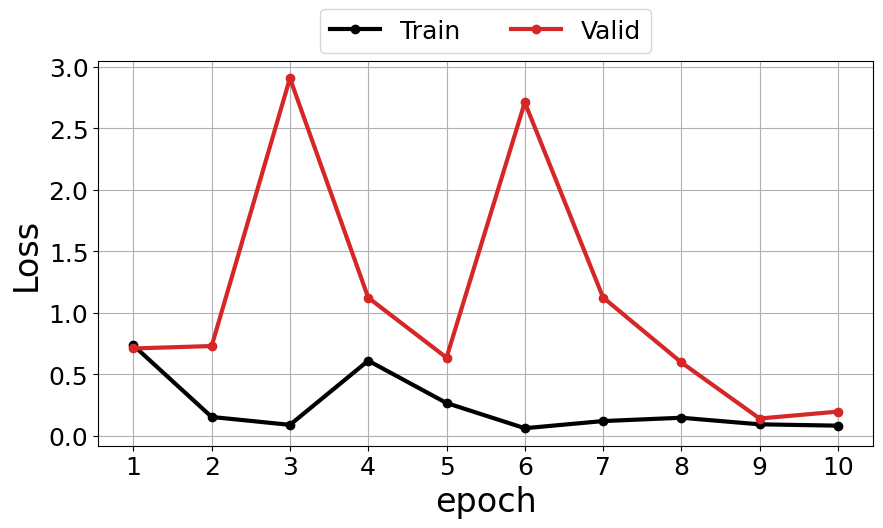

In [21]:
my_classifier.plot_metric(y_axis=["epoch_loss_train", "epoch_loss_val"],
                         y_label="Loss",
                         legends=["Train", "Valid"])

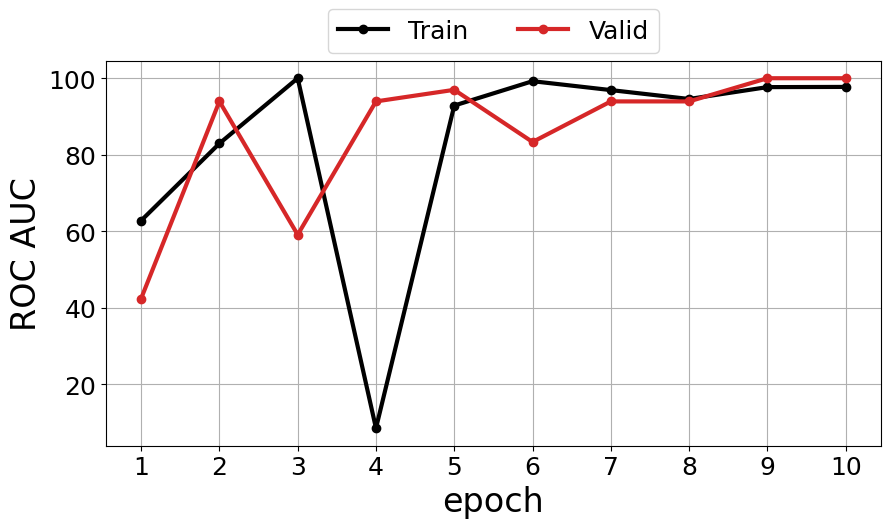

In [22]:
my_classifier.plot_metric(y_axis=["epoch_rocauc_macro_train", "epoch_rocauc_macro_val"],
                         y_label="ROC AUC",
                         legends=["Train", "Valid"],
                         colors=["k", "tab:red"])

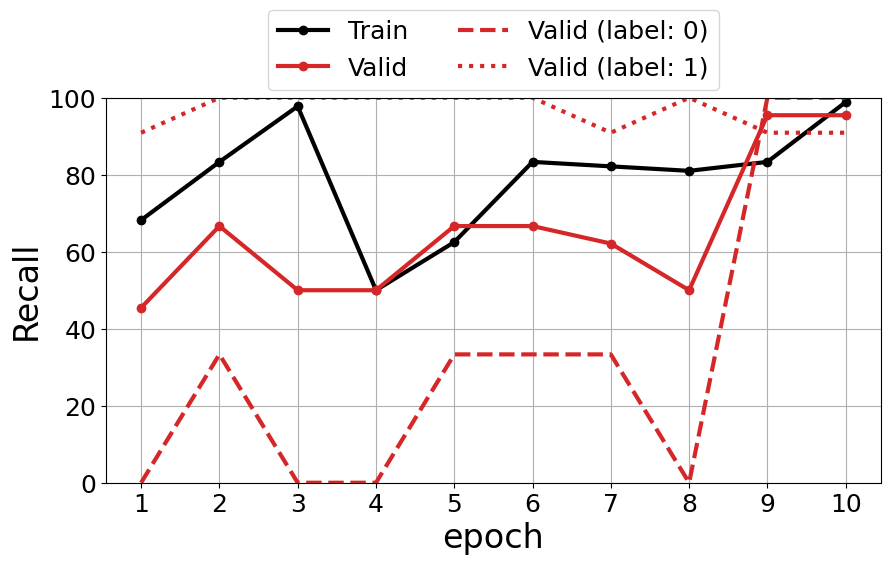

In [23]:
my_classifier.plot_metric(y_axis=["epoch_recall_macro_train",
                                 "epoch_recall_macro_val",
                                 "epoch_recall_0_val",
                                 "epoch_recall_1_val"],
                         y_label="Recall",
                         legends=["Train",
                                  "Valid",
                                  "Valid (label: 0)",
                                  "Valid (label: 1)",],
                         colors=["k", "tab:red", "tab:red", "tab:red"],
                         styles=["-", "-", "--", ":"],
                         markers=["o", "o", "", ""],
                         plt_yrange=[0, 100])

### Model Inference

In [25]:
from mapreader import load_patches

In [27]:
my_maps = load_patches("../content/tifs/patches/*png",
                      parent_paths="../content/tifs/*.tif")


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

In [28]:
parent_df, patch_df = my_maps.convert_images()

In [29]:
# Create dataset from patches
from mapreader import PatchDataset
patch_dataset = PatchDataset(patch_df, transform="val")

In [30]:
my_classifier.load_dataset(patch_dataset,
                            set_name="patches",
                            batch_size=8,
                            shuffle=False)

In [31]:
my_classifier.print_batch_info(set_name='patches')

[INFO] dataset: patches
        - items:        225
        - batch size:   8
        - batches:      29


In [32]:
# Inference
my_classifier.inference(set_name="patches")

[INFO] Each training step will pass: ['patches'].
2023-10-26 16:48:29 PC05258 [INFO] patches  -- 11/11 --      8/225 (  3.6% ) -- 
2023-10-26 16:48:30 PC05258 [INFO] patches  -- 11/11 --     48/225 ( 21.3% ) -- 
2023-10-26 16:48:31 PC05258 [INFO] patches  -- 11/11 --     88/225 ( 39.1% ) -- 
2023-10-26 16:48:32 PC05258 [INFO] patches  -- 11/11 --    128/225 ( 56.9% ) -- 
2023-10-26 16:48:33 PC05258 [INFO] patches  -- 11/11 --    168/225 ( 74.7% ) -- 
2023-10-26 16:48:34 PC05258 [INFO] patches  -- 11/11 --    208/225 ( 92.4% ) -- 
[INFO] Total time: 0m 5s


In [33]:
# Add predictions to dataframe
predictions_df = patch_dataset.patch_df


In [34]:
import numpy as np
import pandas as pd

predictions_df['predicted_label'] = my_classifier.pred_label
predictions_df['pred'] = my_classifier.pred_label_indices
predictions_df['conf'] = np.array(my_classifier.pred_conf).max(axis=1)

predictions_df.head()

parent_id  \
image_id                                                                   
patch-0-0-500-500-#189226695.27_clip.tif#.png      189226695.27_clip.tif   
patch-0-1000-500-1500-#189226695.27_clip.tif#.png  189226695.27_clip.tif   
patch-0-1500-500-2000-#189226695.27_clip.tif#.png  189226695.27_clip.tif   
patch-0-2000-500-2500-#189226695.27_clip.tif#.png  189226695.27_clip.tif   
patch-0-2500-500-3000-#189226695.27_clip.tif#.png  189226695.27_clip.tif   

                                                                                          image_path  \
image_id                                                                                               
patch-0-0-500-500-#189226695.27_clip.tif#.png      c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
patch-0-1000-500-1500-#189226695.27_clip.tif#.png  c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
patch-0-1500-500-2000-#189226695.27_clip.tif#.png  c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
patch-0-2000-500-2500-#189226695.27_clip.tif#.png  c:\Users\alexad\Documents\GitHub\cnn-boundarie...   
patch-0-2500-500-3000-#189226695.27_clip.tif#.png  c:\Users\alexad\Documents\GitHub\cnn-boundarie...   

                                                           pixel_bounds  \
image_id                                                                  
patch-0-0-500-500-#189226695.27_clip.tif#.png          (0, 0, 500, 500)   
patch-0-1000-500-1500-#189226695.27_clip.tif#.png  (0, 1000, 500, 1500)   
patch-0-1500-500-2000-#189226695.27_clip.tif#.png  (0, 1500, 500, 2000)   
patch-0-2000-500-2500-#189226695.27_clip.tif#.png  (0, 2000, 500, 2500)   
patch-0-2500-500-3000-#189226695.27_clip.tif#.png  (0, 2500, 500, 3000)   

                                                  predicted_label  pred  \
image_id                                                                  
patch-0-0-500-500-#189226695.27_clip.tif#.png                wall     1   
patch-0-1000-500-1500-#189226695.27_clip.tif#.png            wall     1   
patch-0-1500-500-2000-#189226695.27_clip.tif#.png            wall     1   
patch-0-2000-500-2500-#189226695.27_clip.tif#.png            wall     1   
patch-0-2500-500-3000-#189226695.27_clip.tif#.png            wall     1   

                                                       conf  
image_id                                                     
patch-0-0-500-500-#189226695.27_clip.tif#.png      0.999202  
patch-0-1000-500-1500-#189226695.27_clip.tif#.png  0.765212  
patch-0-1500-500-2000-#189226695.27_clip.tif#.png  0.999940  
patch-0-2000-500-2500-#189226695.27_clip.tif#.png  1.000000  
patch-0-2500-500-3000-#189226695.27_clip.tif#.png  0.656215

In [35]:
my_maps.add_metadata(patch_df, tree_level="patch")

In [36]:
my_maps.add_shape()

[INFO] Add shape, tree level: parent


In [37]:
parent_df, patch_df = my_maps.convert_images()
parent_df.head()

parent_id  \
image_id                          
189226695.27_clip.tif      None   

                                                              image_path  \
image_id                                                                   
189226695.27_clip.tif  c:\Users\alexad\Documents\GitHub\cnn-boundarie...   

                                                                 patches  \
image_id                                                                   
189226695.27_clip.tif  [patch-0-0-500-500-#189226695.27_clip.tif#.png...   

                                 shape  
image_id                                
189226695.27_clip.tif  (7448, 7448, 3)

  0%|          | 0/1 [00:00<?, ?it/s]

[<Figure size 1500x1500 with 2 Axes>]

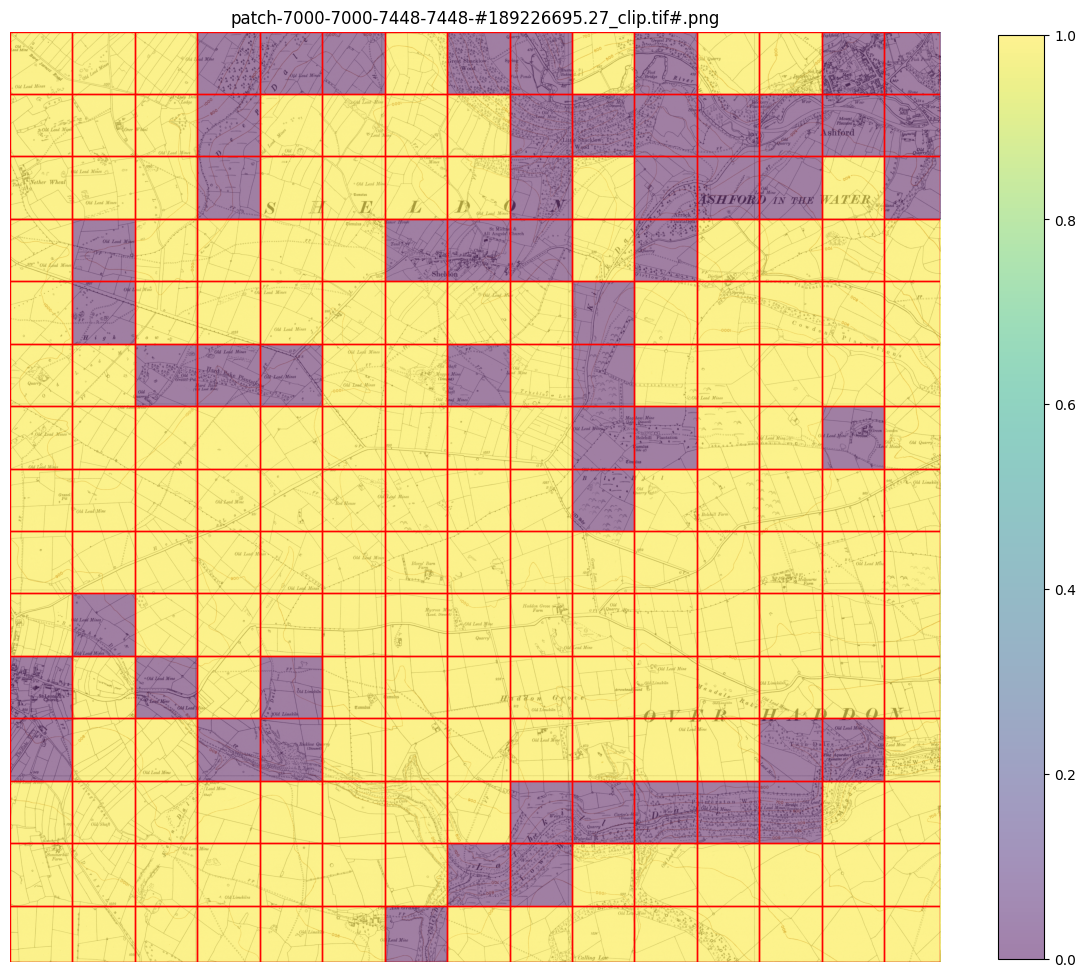

In [38]:
parent_list=my_maps.list_parents()

my_maps.show_parent(parent_list[0],
                column_to_plot="pred",
                patch_border=True,
                plot_parent=True,
                figsize=(15, 15),
                alpha=0.5)

  0%|          | 0/1 [00:00<?, ?it/s]

[<Figure size 1500x1500 with 2 Axes>]

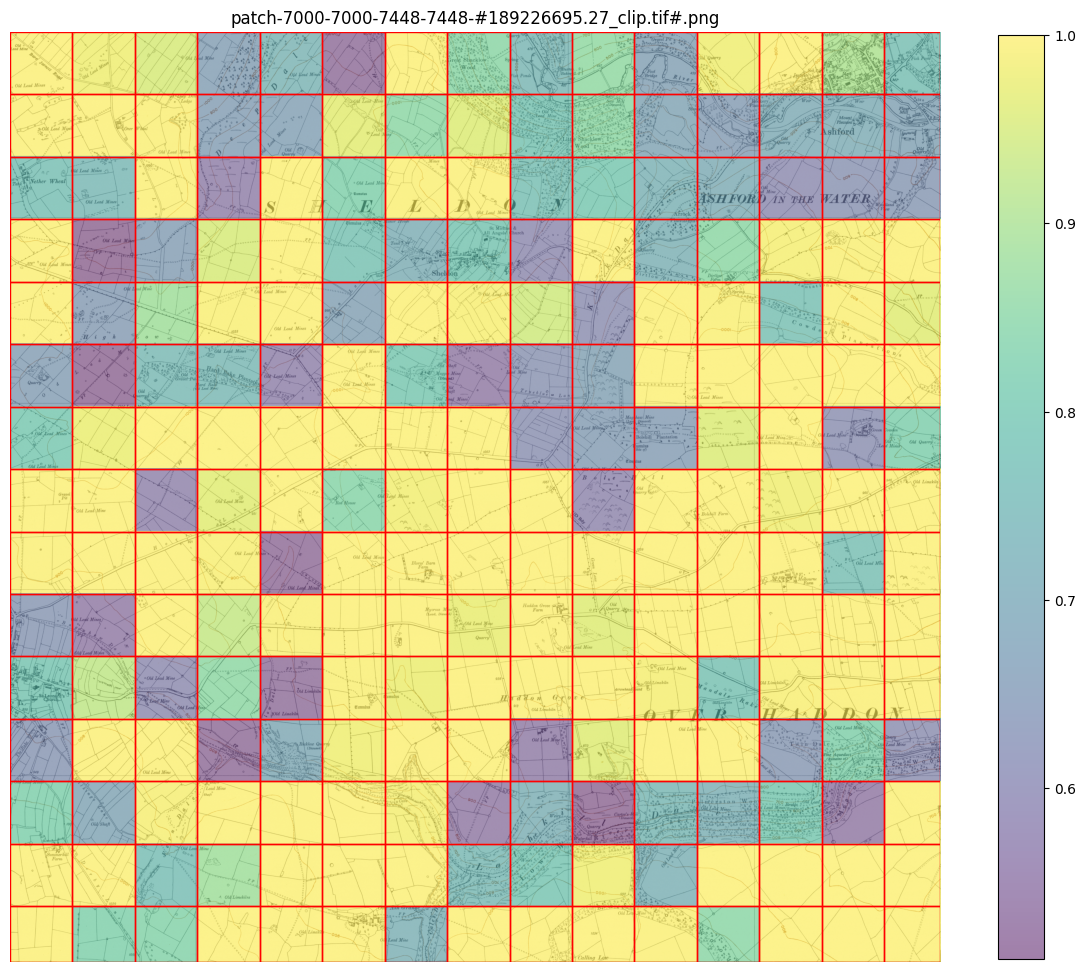

In [39]:
parent_list=my_maps.list_parents()

my_maps.show_parent(parent_list[0],
                column_to_plot="conf",
                patch_border=True,
                plot_parent=True,
                figsize=(15, 15),
                alpha=0.5)